Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


### Exploratory Data Analysis using Python for Movies

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
#checking for duplicates
movies_df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [5]:
# code here
delete_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 
                'production_companies', 'original_title']

movies_df = movies_df.drop(delete_col_list, axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   popularity            4803 non-null   float64
 4   production_countries  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   spoken_languages      4803 non-null   object 
 9   title                 4803 non-null   object 
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 450.4+ KB


In [7]:
#Checking for the sum of missing values
movies_df.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

<AxesSubplot:>

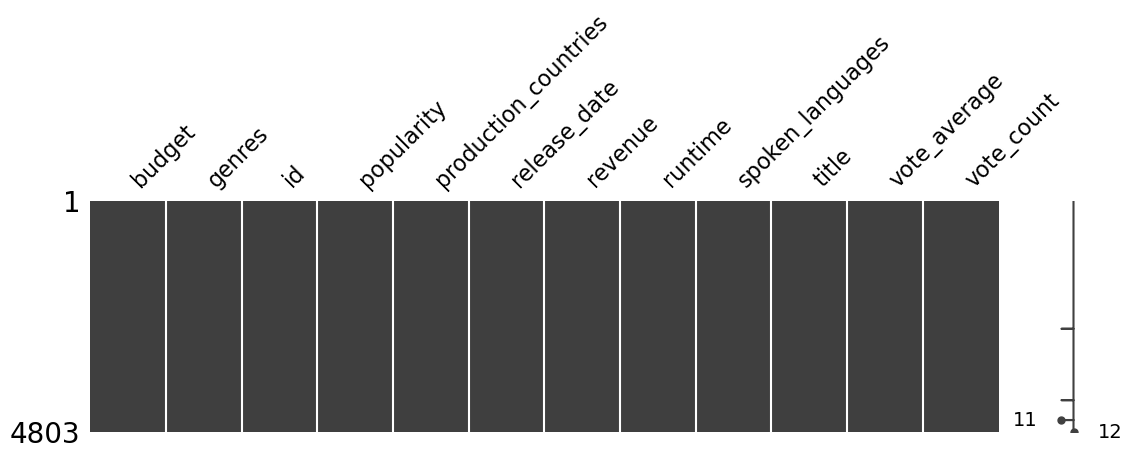

In [8]:
# Visualise missing data
missingno.matrix(movies_df, figsize = (13,3))

#### Remove any duplicate rows

In [9]:
# code here
movies_df = movies_df.drop_duplicates(keep='first')
movies_df.shape

(4803, 12)

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [10]:
# Code here
cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 12)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [11]:
# Change the release_date column to DateTime column
movies_df.release_date = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [12]:
# code here
change_cols = ['budget', 'revenue']
# changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [13]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted

    Results:
        movies_df will have column dropped and replaced with a new column for each unique value
        For example, if the "genres" column had an "Action" in it, there will be a new column
        called "genres_Action". Every movie that had the "Action" genre will have a 1 in that column,
        and 0 otherwise.
    """
    global movies_df # ensure that we can directly manipulate movies_df
    movies_df.reset_index(drop=True, inplace=True) # Reset the index of the DataFrame
    new_columns = {} # Keeps a track of all unique names
    for index, i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        # For each Dataframe index, zipped with a JSON object for that column
        # We want to get a list of all of the items associated with 'key'
        list1=[]
        for j in range(len(i)):
            # For each item in the current JSON object
            list1.append((i[j][key]))# Append the item to a list
        for item in list1:
            # For each item found, append to movies_df
            if f"{column}_{item}" not in new_columns.keys():
                # If this item doesn't have a corresponding column, create one
                new_columns[f"{column}_{item}"] = np.array([0] * movies_df.shape[0])
            new_columns[f"{column}_{item}"][index] = 1
    # Concatenate new columns to movies_df
    movies_df = pd.concat([movies_df, pd.DataFrame(new_columns)], axis=1).drop(column, axis=1)

# Call the function
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

print(movies_df.columns)

Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'release_year',
       ...
       'production_countries_Greece', 'production_countries_Lithuania',
       'production_countries_Austria', 'production_countries_Thailand',
       'production_countries_Fiji',
       'production_countries_Serbia and Montenegro',
       'production_countries_Israel', 'production_countries_Indonesia',
       'production_countries_Angola', 'production_countries_Iran'],
      dtype='object', length=148)


In [14]:
movies_df.columns

Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',
       'title', 'vote_average', 'vote_count', 'release_year',
       ...
       'production_countries_Greece', 'production_countries_Lithuania',
       'production_countries_Austria', 'production_countries_Thailand',
       'production_countries_Fiji',
       'production_countries_Serbia and Montenegro',
       'production_countries_Israel', 'production_countries_Indonesia',
       'production_countries_Angola', 'production_countries_Iran'],
      dtype='object', length=148)

### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [15]:
# Code here

expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,release_year,...,production_countries_Greece,production_countries_Lithuania,production_countries_Austria,production_countries_Thailand,production_countries_Fiji,production_countries_Serbia and Montenegro,production_countries_Israel,production_countries_Indonesia,production_countries_Angola,production_countries_Iran
17,380000000,1865,135.413856,2011-05-14,1045713802,136.0,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,...,0,0,0,0,0,0,0,0,0,0
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,...,0,0,0,0,0,0,0,0,0,0
7,280000000,99861,134.279229,2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,6767,2015,...,0,0,0,0,0,0,0,0,0,0
10,270000000,1452,57.925623,2006-06-28,391081192,154.0,Superman Returns,5.4,1400,2006,...,0,0,0,0,0,0,0,0,0,0
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,2012,...,0,0,0,0,0,0,0,0,0,0


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [16]:
# code here
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget', 'profit', 'revenue', 'id', 'popularity', 'release_date',
        'release_year', 'runtime', 'title', 'vote_average', 'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['budget'], ascending=False).head()

,budget,profit,revenue,id,popularity,release_date,release_year,runtime,title,vote_average,vote_count
17,380000000,665713802,1045713802,1865,135.413856,2011-05-14,2011,136.0,Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,661000000,961000000,285,139.082615,2007-05-19,2007,169.0,Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,1125403694,1405403694,99861,134.279229,2015-04-22,2015,141.0,Avengers: Age of Ultron,7.3,6767
10,270000000,121081192,391081192,1452,57.925623,2006-06-28,2006,154.0,Superman Returns,5.4,1400
4,260000000,24139100,284139100,49529,43.926995,2012-03-07,2012,132.0,John Carter,6.1,2124


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [17]:
# Code here
movies_df[movies_df['vote_average'] >= 7.0]

,budget,profit,revenue,id,popularity,release_date,release_year,runtime,title,vote_average,vote_count
0,237000000,2550965087,2787965087,19995,150.437577,2009-12-10,2009,162.0,Avatar,7.2,11800
3,250000000,834939099,1084939099,49026,112.312950,2012-07-16,2012,165.0,The Dark Knight Rises,7.6,9106
6,260000000,331794936,591794936,38757,48.681969,2010-11-24,2010,100.0,Tangled,7.4,3330
7,280000000,1125403694,1405403694,99861,134.279229,2015-04-22,2015,141.0,Avengers: Age of Ultron,7.3,6767
8,250000000,683959197,933959197,767,98.885637,2009-07-07,2009,153.0,Harry Potter and the Half-Blood Prince,7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...
3213,160000,6546368,6706368,1779,3.284903,1989-09-01,1989,91.0,Roger & Me,7.4,90
3218,10000,6990000,7000000,985,20.399578,1977-03-19,1977,89.0,Eraserhead,7.5,485
3219,60000,3161152,3221152,473,27.788067,1998-07-10,1998,84.0,Pi,7.1,586
3224,27000,3124130,3151130,2292,19.748658,1994-09-13,1994,92.0,Clerks,7.4,755


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [18]:
# Code here

profits_year = movies_df.groupby('release_year')['profit'].sum()
profits_year

release_year
1916        8008844
1925       21755000
1927      -91969578
1929        3979000
1930        4050000
           ...     
2012    16665370551
2013    15191240622
2014    17029736072
2015    16082841939
2016     9857836853
Name: profit, Length: 89, dtype: int64

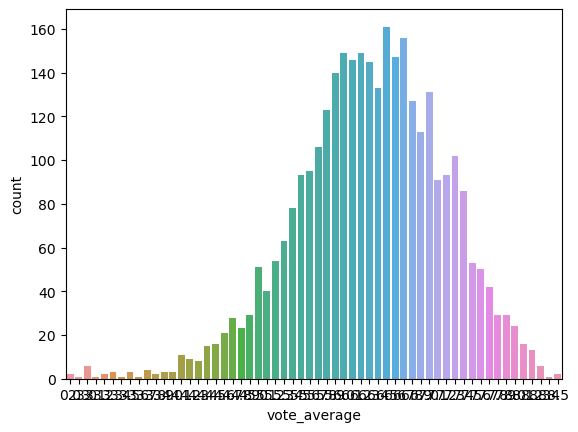

In [19]:
sns.countplot(data=movies_df, x="vote_average")
plt.show()



#### Revenue vs Popularity by Vote Average

There are some exceptions to this trend, such as movies that have high vote average but low revenue or low popularity, or movies that have low vote average but high revenue or high popularity. These movies may have other factors that affect their revenue and popularity, such as niche appeal, word-of-mouth, awards, etc

#### Profit vs Runtime by Vote Average
There are some exceptions to this trend, such as movies that have high vote average but low profit, or movies that have low vote average but high profit. These movies may have other factors that affect their profitability, such as marketing, distribution, genre, etc

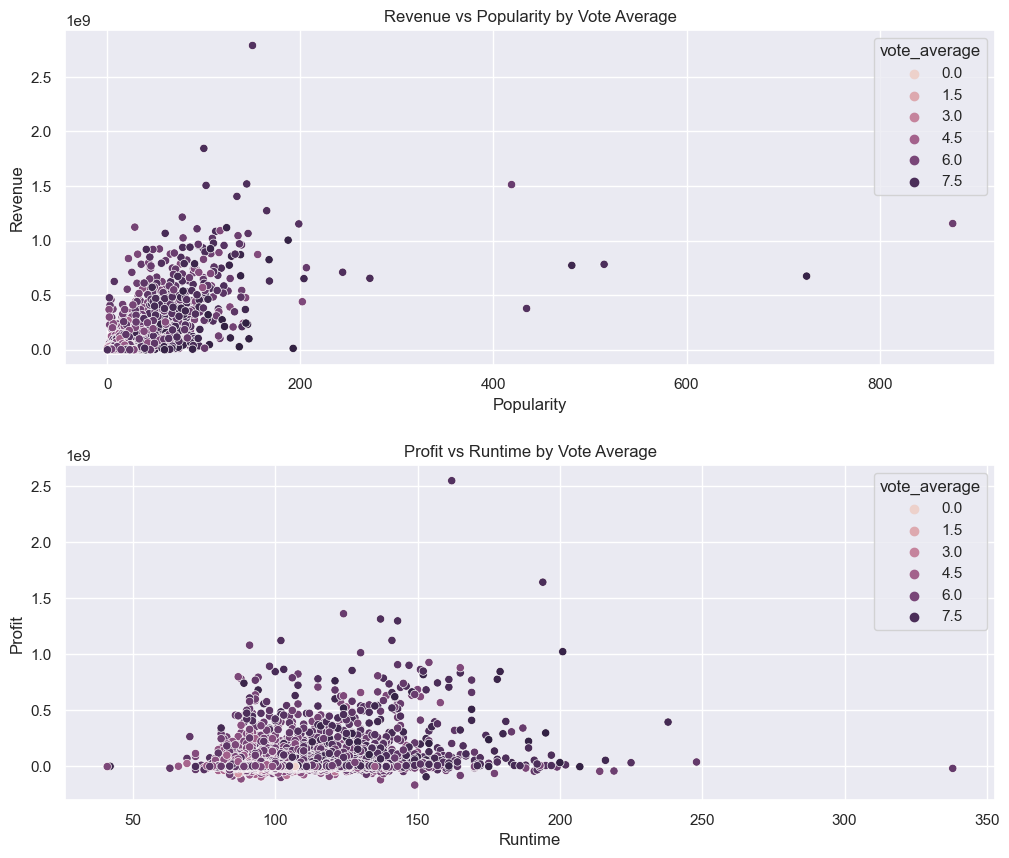

In [58]:
f,axes = plt.subplots(2,1,figsize=(12,10))
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x="popularity",y="revenue",data=movies_df,hue="vote_average",ax=axes[0])
axes[0].set_xlabel("Popularity")
axes[0].set_ylabel("Revenue")
axes[0].set_title("Revenue vs Popularity by Vote Average")
sns.scatterplot(x='runtime',y='profit',data=movies_df,hue="vote_average",ax=axes[1])
axes[1].set_xlabel("Runtime")
axes[1].set_ylabel("Profit")
axes[1].set_title("Profit vs Runtime by Vote Average")
plt.subplots_adjust(hspace=0.3)


#### Revenue vs Popularity vs Vote Average


There are some exceptions to this trend, such as movies that have high vote average but low profit, or movies that have low vote average but high profit. These movies may have other factors that affect their profitability, such as marketing, distribution, genre, etc.

#### Profit vs Runtime by Vote Average
There are some exceptions to this trend, such as movies that have high vote average but low revenue or low budget, or movies that have low vote average but high revenue or high budget. These movies may have other factors that affect their revenue and budget, such as niche appeal, word-of-mouth, awards, etc.

There are some exceptions to this trend, such as movies that have high vote average but low profit, or movies that have low vote average but high profit. These movies may have other factors that affect their profitability, such as marketing, distribution, genre, etc.


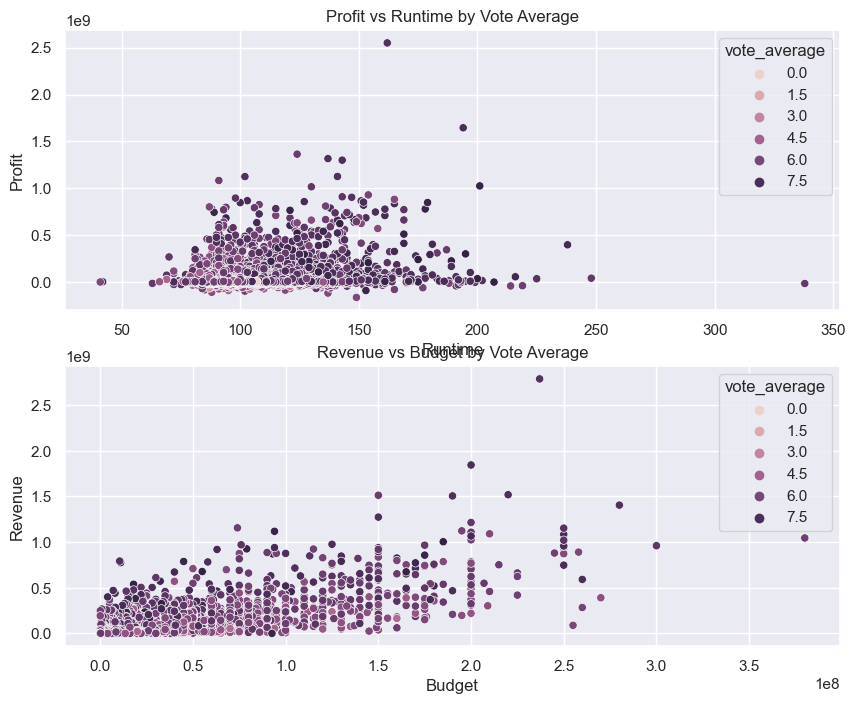

In [57]:
f,axes = plt.subplots(2,1)
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x='runtime',y='profit',data=movies_df,hue="vote_average",ax=axes[0])
axes[0].set_xlabel("Runtime")
axes[0].set_ylabel("Profit")
axes[0].set_title("Profit vs Runtime by Vote Average")
sns.scatterplot(x='budget',y='revenue',data=movies_df,hue="vote_average",ax=axes[1])
axes[1].set_xlabel("Budget")
axes[1].set_ylabel("Revenue")
axes[1].set_title("Revenue vs Budget by Vote Average")




In [59]:
start_year = 1990
end_year = 2000
filtered_df = movies_df[(movies_df['release_year'] >= start_year) & (movies_df['release_year'] <= end_year)]

<AxesSubplot:xlabel='release_year', ylabel='revenue'>

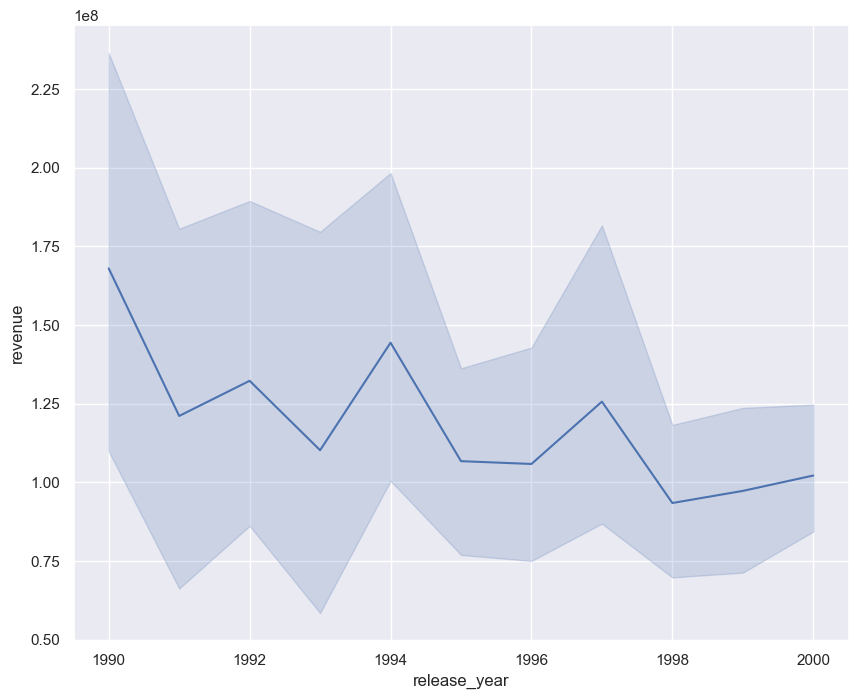

In [60]:
sns.lineplot(x="release_year", y="revenue", data=filtered_df)


<AxesSubplot:xlabel='release_year', ylabel='revenue'>

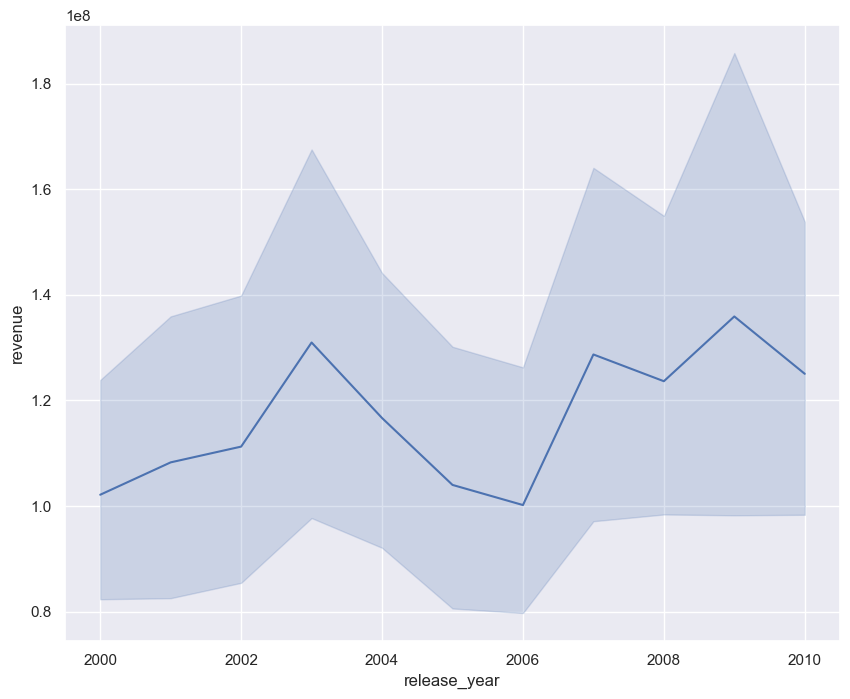

In [23]:
#Filtering the first decade in the new millenium
start_year = 2000
end_year = 2010
filtered_df1 = movies_df[(movies_df['release_year'] >= start_year) & (movies_df['release_year'] <= end_year)]
#plotting a line plot for revenue generated by movies against release year
sns.lineplot(x="release_year", y="revenue", data=filtered_df1)

In [24]:
movies_df

,budget,profit,revenue,id,popularity,release_date,release_year,runtime,title,vote_average,vote_count
0,237000000,2550965087,2787965087,19995,150.437577,2009-12-10,2009,162.0,Avatar,7.2,11800
1,300000000,661000000,961000000,285,139.082615,2007-05-19,2007,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,635674609,880674609,206647,107.376788,2015-10-26,2015,148.0,Spectre,6.3,4466
3,250000000,834939099,1084939099,49026,112.312950,2012-07-16,2012,165.0,The Dark Knight Rises,7.6,9106
4,260000000,24139100,284139100,49529,43.926995,2012-03-07,2012,132.0,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,3124130,3151130,2292,19.748658,1994-09-13,1994,92.0,Clerks,7.4,755
3225,12000,5988000,6000000,692,4.553644,1972-03-12,1972,93.0,Pink Flamingos,6.2,110
3226,20000,79000,99000,36095,0.212443,1997-11-06,1997,111.0,Cure,7.4,63
3227,7000,417760,424760,14337,23.307949,2004-10-08,2004,77.0,Primer,6.9,658


### Exploratory Data Analysis using Python for Automobile

Aaron Huber is a talented photographer who specializes in capturing stunning images of cars, landscapes, and architecture. He has a passion for vintage cars and their impact on the history and culture of the automobile industry. His photo “The Impact of the Automobile” is a beautiful example of his work, showing a classic car parked on a grassy field with a dark background. The photo creates a contrast between the old and the new, the natural and the artificial, the past and the present. The photo also evokes a sense of nostalgia and admiration for the car and its design.

![SNOWFALL](vintage-car.jpg)


### Reading the dataset

In [25]:
df = pd.read_csv('automobile.txt')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data Exploration

In [26]:
# fill missing data of stroke
df_temp = df[df['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df['stroke'] = df['stroke'].replace('?',normalised_mean).astype(float)

In [27]:
# The data contains question marks. We can replace it with NAN
df_data = df.replace('?',np.NAN) 
df_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [28]:
df_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [29]:
# display summary of the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [30]:
# View Features
df_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [31]:
# Stats of the data set
df_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,stroke,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255423,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,49.000000,54.000000


In [32]:
# Number of missing data points per column
missing_values_count = df_data.isnull().sum()
missing_values_count

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### We need to fill in the missing data

In [33]:
# fill missing data of normalised losses
df_temp = df[df['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',normalised_mean).astype(int)

In [34]:
# fill missing data of price
df_temp = df[df['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
df['price'] = df['price'].replace('?',normalised_mean).astype(int)

In [35]:
# fill missing data of horsepower
df_temp = df[df['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',normalised_mean).astype(int)

In [36]:
# fill missing data of peak rpm
df_temp = df[df['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df['peak-rpm'] = df['peak-rpm'].replace('?',normalised_mean).astype(int)

In [37]:
# fill missing data of bore
df_temp = df[df['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
df['bore'] = df['bore'].replace('?',normalised_mean).astype(float)

In [38]:
# fill missing data of stroke
df_temp = df[df['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df['stroke'] = df['stroke'].replace('?',normalised_mean).astype(float)

In [39]:
# Fill missing data category Number of doors with the mode of the column i.e. Four
df['num-of-doors'] = df['num-of-doors'].replace('?','four')

In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [41]:
# stats
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data visualisation 

###  histogram of the engine size, peak rpm, curb weight, horsepower and price

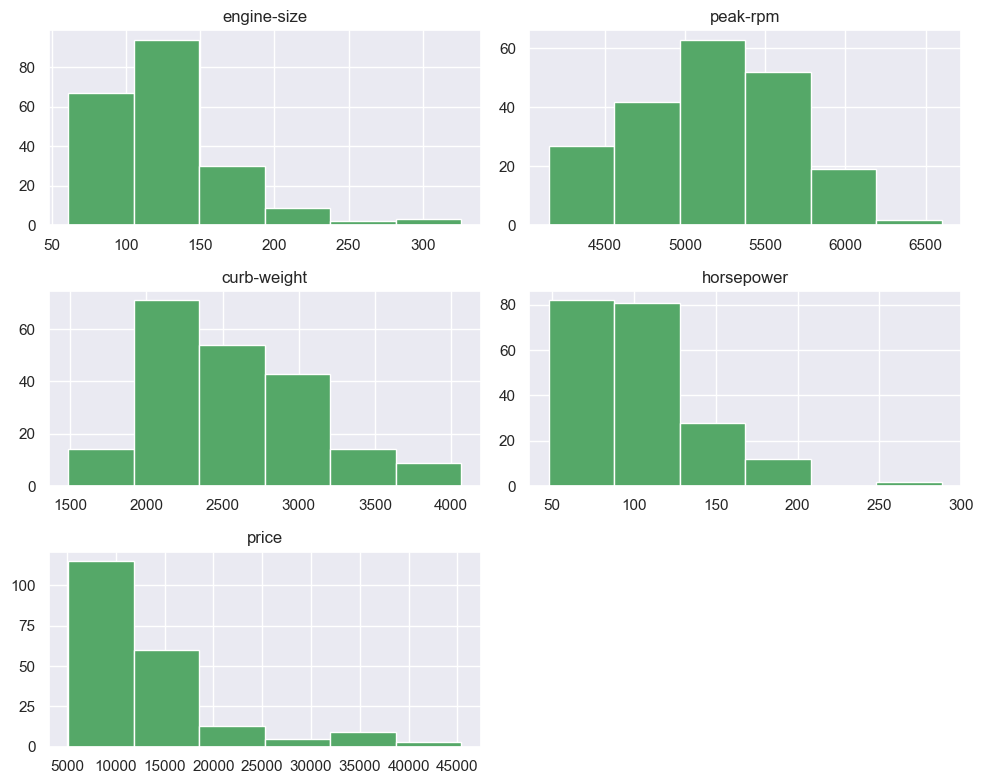

In [42]:
# histogram of the engine size, peak rpm, curb weight, horsepower and price
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='g')
plt.tight_layout()
plt.show()

### Correlation Analysis

The heatmap shows that some variables have a high correlation with each other, such as engine size and horsepower, curb weight and length, highway mpg and city mpg, etc. These variables tend to move together in the same or opposite direction, indicating a linear relationship. The heatmap also shows that some variables have a low or no correlation with each other, such as symboling and bore, peak rpm and compression ratio, etc. These variables do not show any clear pattern of association, indicating a lack of relationship

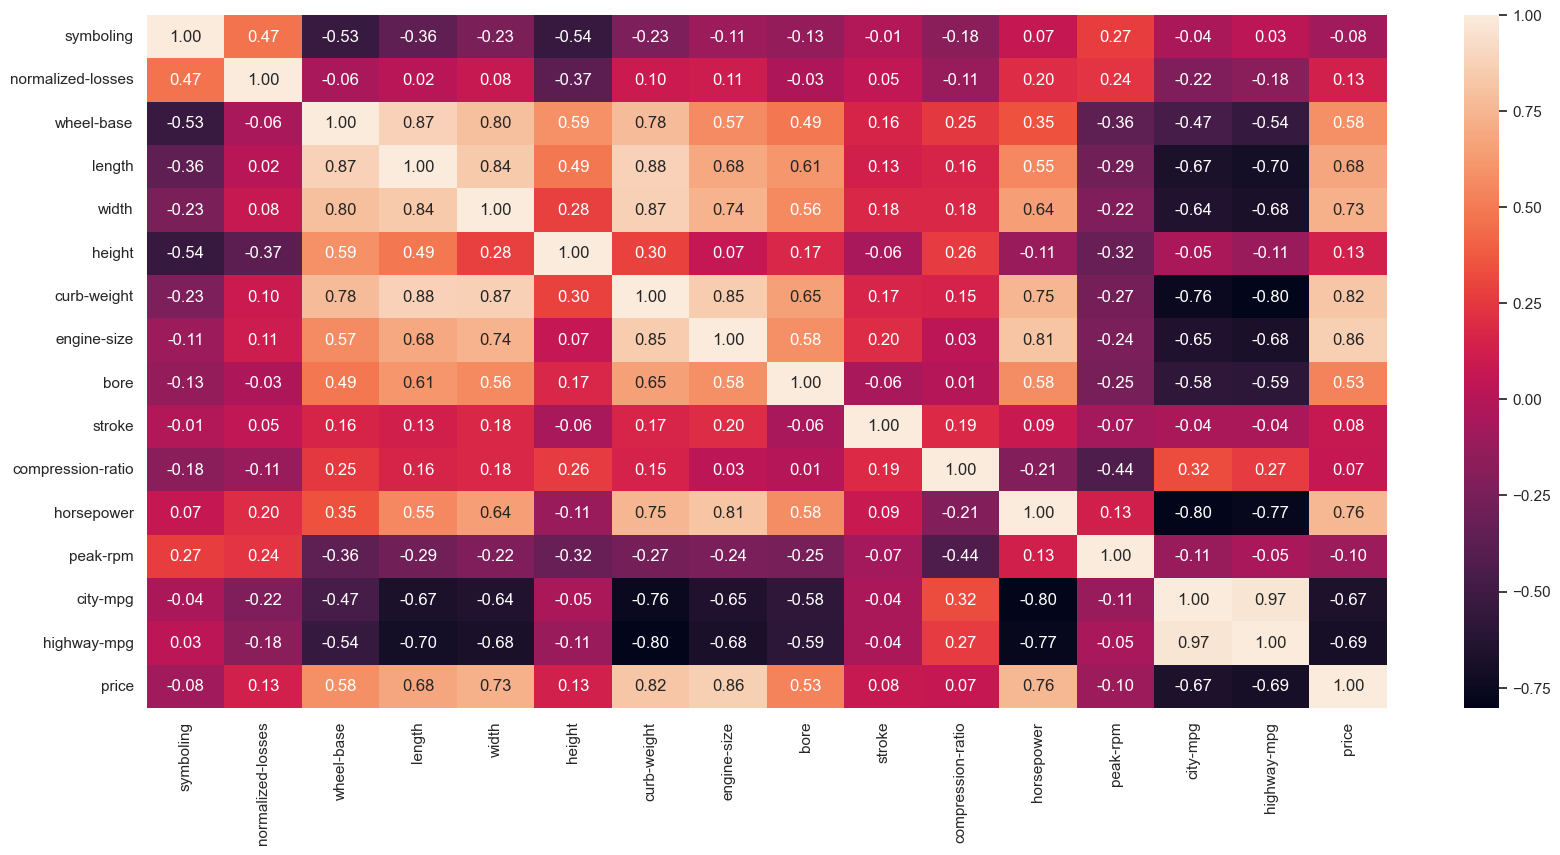

In [43]:
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

### The Boxlots for price and make

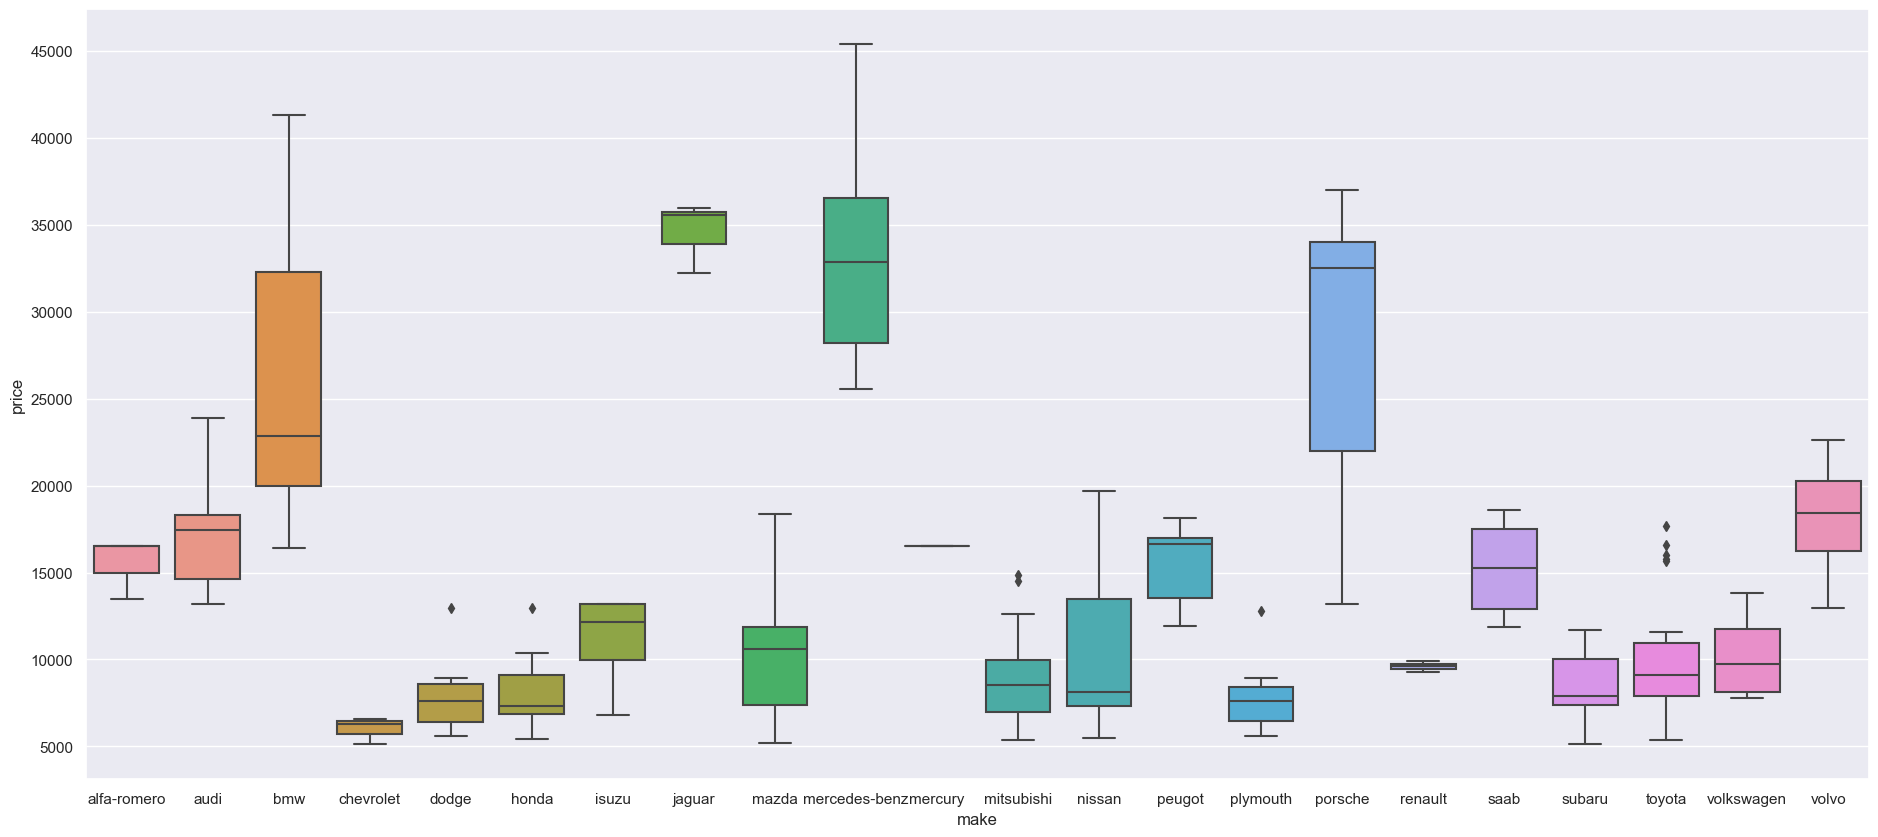

In [44]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

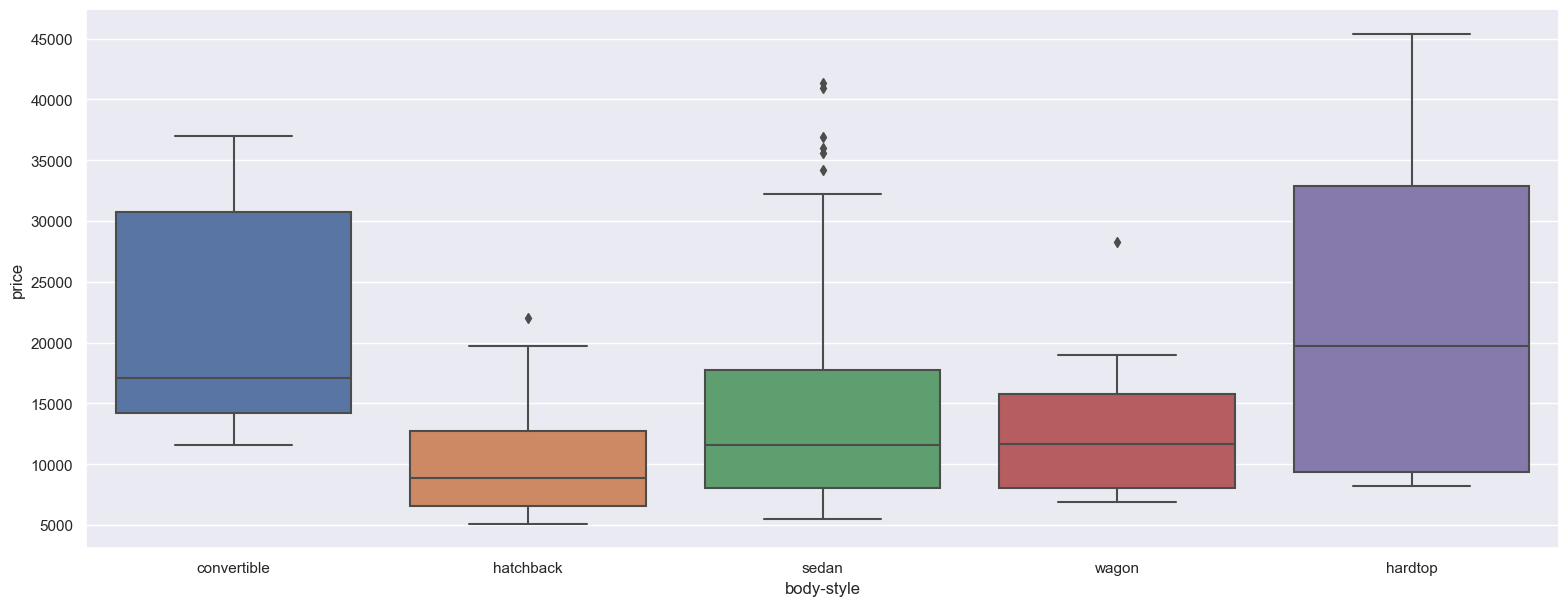

In [45]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

### The catplot

The categorical plot shows that the convertible and hardtop cars have the highest average prices, while the hatchback cars have the lowest. The sedan and wagon cars have similar average prices, but the wagon cars have a wider range of prices. The plot also shows that the turbo cars have higher average prices than the standard cars for all body styles, except for the wagon cars, where the difference is not significant. The plot also shows that the effect of aspiration is more pronounced for the convertible and hardtop cars than for the other body styles.

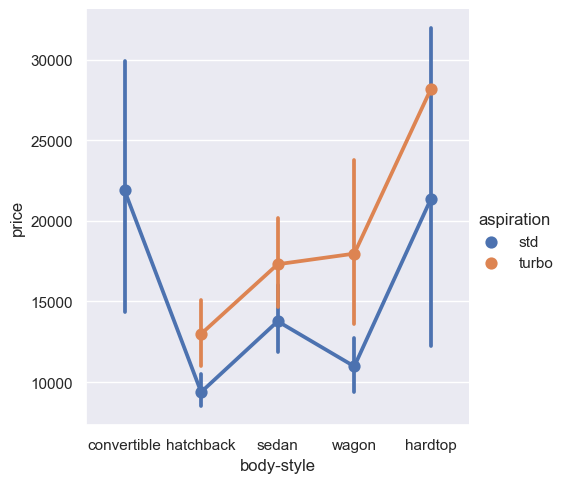

In [46]:
sns.catplot(data=df, x="body-style", y="price", hue="aspiration" ,kind="point")

### Box plot

The boxplot shows the distribution of prices for different types of drive wheels. We can see that the rear wheel drive cars have the highest median and range of prices, while the front wheel drive cars have the lowest. The four wheel drive cars have a slightly higher median price than the front wheel drive cars, but a lower range. However, we should note that there are only a few observations for the four wheel drive cars in our dataset, so this result may not be very reliable.

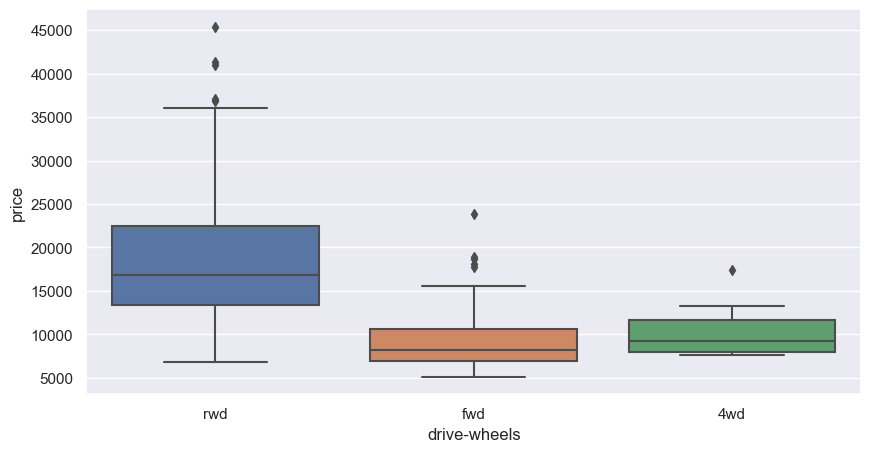

In [47]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

### Normalized losses based on body style and no. of doors

The normalized loss is a measure of how much a car costs to insure, based on various factors such as body style and number of doors. The boxplot shows how the normalized loss varies for different combinations of these factors. We can see that the two door cars tend to have higher normalized losses than the four door cars, regardless of the body style. This suggests that the two door cars are more risky or expensive to insure than the four door cars.

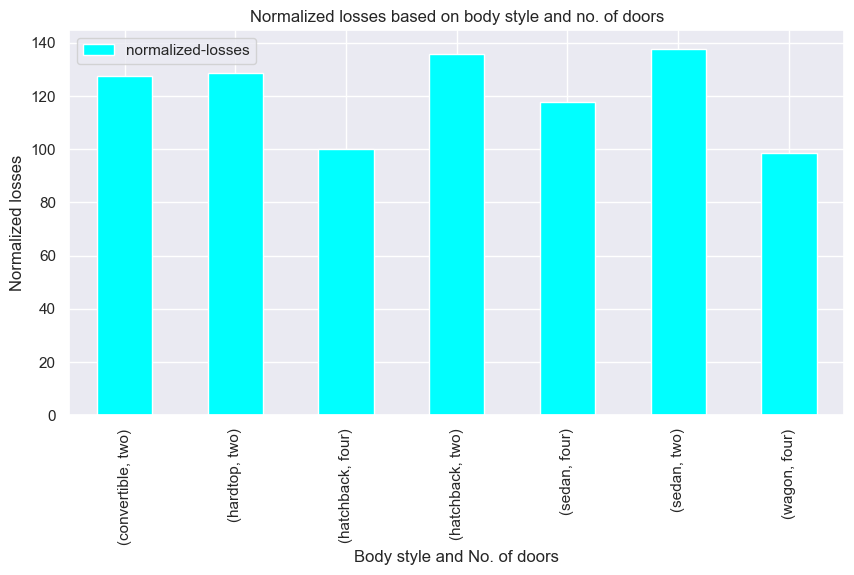

In [48]:
# Normalized losses based on body style and no. of doors
pd.pivot_table(df,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='cyan')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

### Distribution of Car Prices

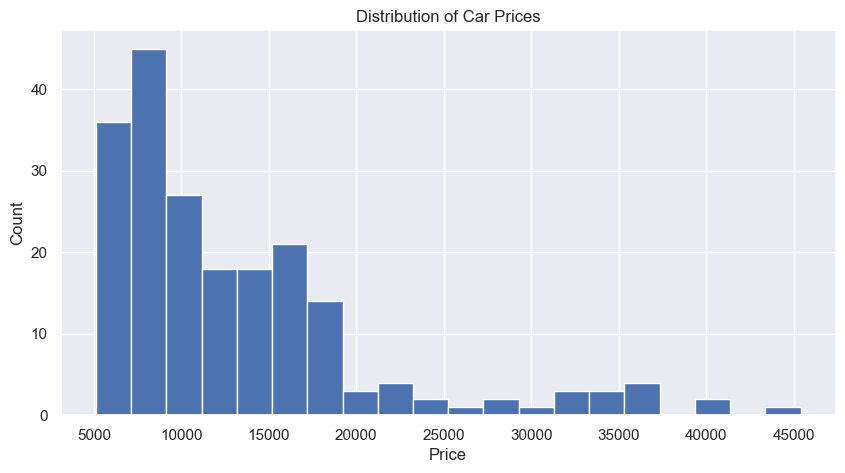

In [49]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

### Price vs Horsepower

The output the code is a graphical representation of the relationship between price and horsepower for the cars in the dataset. The scatter plot shows that there is a positive correlation between price and horsepower, meaning that as the horsepower increases, the price also tends to increase. However, the correlation is not very strong, as there are some outliers and variations in the data. For example, there are some cars with low horsepower but high price, and some cars with high horsepower but low price. The scatter plot also shows that most of the cars have a horsepower between 50 and 150, and a price between 5000 and 20000.

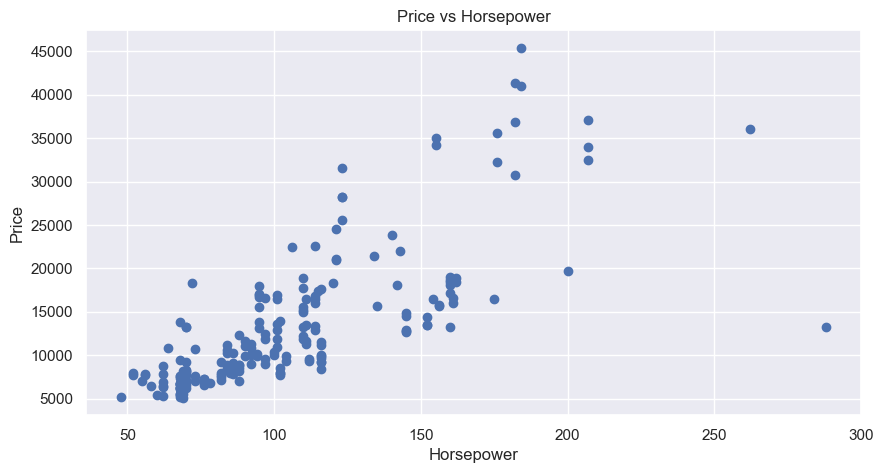

In [50]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Price vs Horsepower')
plt.show()

<AxesSubplot:xlabel='horsepower', ylabel='price'>

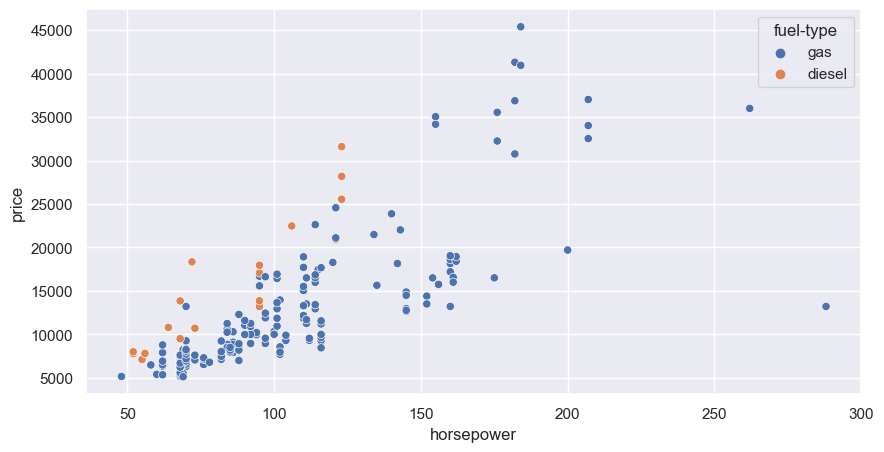

In [51]:
#f['horsepower'], df['price']
sns.scatterplot(x="horsepower", y="price", hue="fuel-type", sizes=(50, 200),data=df)

### Conclusion

Conclusion In this project, we have analyzed a dataset of cars with various features and attributes. 

We have found that:

1.) The data set is skewed towards Japanese cars with four cylinders, four doors, front wheel drive, and gas fuel type. It also      has some outliers and missing values that need to be handled carefully.

2.) Some numerical variables have strong linear relationships with each other, such as engine size and horsepower, curb weight     and length, highway mpg and city mpg, etc. However, some variables have no or weak relationships with each other, such as       symboling and bore, peak rpm and compression ratio, etc.

3.) The normalized loss, which measures the insurance cost of a car, varies significantly by body style and aspiration. The         convertible and hardtop cars have the highest normalized losses, while the hatchback cars have the lowest. The turbo cars       have higher normalized losses than the standard cars for most body styles.

4.) The symboling, which rates the riskiness of a car to insure, is mostly low or medium for most cars. However, some cars have     high symboling ratings, which are associated with higher horsepower, lower mpg, and higher price.
    
5.) The mileage, which measures the fuel efficiency of a car in city and highway driving, shows a trade-off between city mpg       and highway mpg. Some cars are more suitable for city driving, while others are more suitable for highway driving. Diesel       cars have higher mileage than gas cars in both driving conditions.

6.)The price, which reflects the value and performance of a car, is influenced by many factors, such as engine size,              horsepower, curb weight, body style, drive wheels, etc. We have built a regression model that can explain 
   about 81% of the variation in price based on these factors.
   
7.) The drive wheels and curb weight are two important features that affect the price and performance of a car. Rear wheel         drive cars are more powerful and expensive than front wheel or four wheel drive cars. They also have higher 
    curb weight than front wheel or four wheel drive cars.
    
    
These are some of the main findings of our data analysis on a dataset of cars with various features and attributes. We have learned how to use Python libraries such as pandas, numpy, matplotlib, seaborn, scipy, and statsmodels to manipulate, visualize, and model the data. We have also learned how to use descriptive statistics, visualizations, and hypothesis testing to answer some research questions and discover some interesting patterns and relationships in the data. We hope that this project has helped us gain some insights and knowledge about the automobile industry and the factors that affect the value and performance of a car.